In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
df = pd.read_csv('Data.csv')

In [24]:
df.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar�(INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting�(AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis�(ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid�(ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook�(ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [25]:
#New dataframe containing players with min 30 matches played
df1 = df[df['Mat'] > 30] 

#Converting avg from object to floats
df1['Avg']=df1['Avg'].apply(lambda x: float(x))

df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 1731
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          535 non-null    object 
 1   Span            535 non-null    object 
 2   Mat             535 non-null    int64  
 3   Inn             535 non-null    object 
 4   NO              535 non-null    object 
 5   Runs            535 non-null    object 
 6   HS              535 non-null    object 
 7   Avg             535 non-null    float64
 8   100             535 non-null    object 
 9   50              535 non-null    object 
 10  0               535 non-null    object 
 11  Player Profile  535 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 54.3+ KB


<ipython-input-25-5b5b66445f94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Avg']=df1['Avg'].apply(lambda x: float(x))


In [26]:
df1['Avg'].max() #Checking if Bradman's is the highest value

99.94

In [27]:
#Graph (Scatter Plot) of all players' averages
df2 = df1.loc[ : , df1.columns == 'Avg'] #new dataframe with all cols except average removed
df2.head()

,Avg
0,53.78
1,51.85
2,55.37
3,52.31
4,45.35


In [28]:
df2['S No'] = df2.index
df2.head()

<ipython-input-28-0468e4eea364>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['S No'] = df2.index


,Avg,S No
0,53.78,0
1,51.85,1
2,55.37,2
3,52.31,3
4,45.35,4


<AxesSubplot:xlabel='S No', ylabel='Avg'>

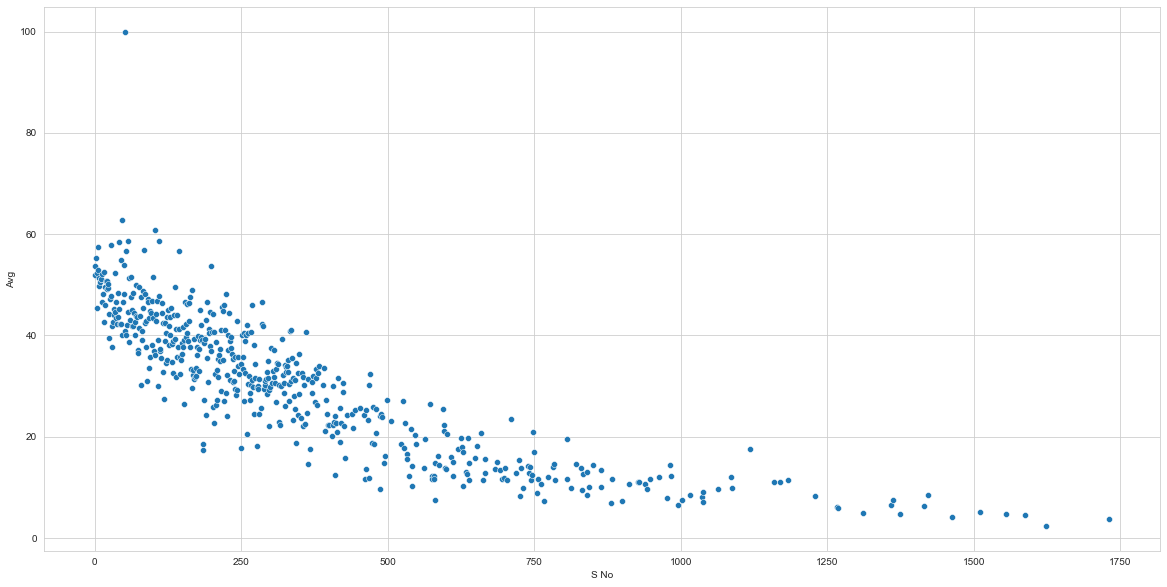

In [29]:
#Plotting scatter of just averages
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.scatterplot(x='S No', y='Avg', data=df2)

In [30]:
#Getting list of top 20 averages apart from Bradman
#New dataframe containing only player name and average (to manually type into the scatterplot above)
x = df1[['Player', 'Avg']]
x.sort_values('Avg', ascending=False).head(21)

,Player,Avg
52,DG Bradman�(AUS),99.94
47,SPD Smith�(AUS),62.84
103,H Sutcliffe�(ENG),60.73
56,KF Barrington�(ENG),58.67
110,ED Weekes�(WI),58.61
42,WR Hammond�(ENG),58.45
28,GS Sobers�(WI),57.78
5,KC Sangakkara�(SL),57.40
84,JB Hobbs�(ENG),56.94
144,CL Walcott�(WI),56.68


In [31]:
df2['Avg'].mean() # mean of averages of all cricketers

30.715271028037368

In [32]:
df2['Avg'].median() # median of averages of all cricketers

31.83

In [33]:
df3 = df2[df2['Avg'] >= 31.83] # only including pure batsman (ie cricketers whose batting average is > median)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 469
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Avg     269 non-null    float64
 1   S No    269 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [34]:
df3['Avg'].mean() # checking mean batting average of pure batsman

41.912750929367995

In [35]:
df3['Avg'].median() # checking median batting average of pure batsman

41.0

In [36]:
df3.Avg.std() # checking standard deviation of pure batsman


7.509226803091624

The Null Hypothesis here can be framed as:</p> 

H0: Avg = 99.94 with level of significance α = 0.0002 (or 1 in 5000 which Leicester's pre-season win odds)

Mean Batting Average, μ = 33.79
Standard Deviation, σ = 11.95
Observed Value, x = 99.94

Hence, Bradman's Z-score => (x - μ) / σ => (99.94 - 33.79) / 11.95 => 5.53

A z-table lookup on a level of significance α = 0.0002, gives us a z-critical of 3.54. Since Bradman's z-score of 5.53 is greater than the z-critical value of 3.54, we can reject the null hypothesis, and the data suggests that Bradman's outlying batting average is a statistical occurrence rarer than 1 in 5000

As a side note, plugging in a z-score of 5.53 gives us a Z-critical value of 0.999999927972299. In other words, Bradman's outlying average has an occurrence probability of 1 in over 50 million! Re-doing the numbers to only include a certain minimum number of matches played, or by applying more stringent criteria to defining a 'pure batsman' results in even greater odds.